In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv('~/data/toxicity/offens_eval/training/offenseval-training-v1.tsv', sep='\t',keep_default_na=False)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
id           13240 non-null int64
tweet        13240 non-null object
subtask_a    13240 non-null object
subtask_b    13240 non-null object
subtask_c    13240 non-null object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [4]:
train[train.tweet.isna()].shape

(0, 5)

In [52]:
train['tweet']= train.tweet.fillna('')

In [5]:
train.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NULL
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NULL,NULL
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NULL
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NULL,NULL


In [9]:
train.groupby('subtask_a').size()

subtask_a
NOT    8840
OFF    4400
dtype: int64

In [11]:
train.groupby('subtask_b').size()

subtask_b
NULL    8840
TIN     3876
UNT      524
dtype: int64

In [12]:
train.groupby('subtask_c').size()

subtask_c
GRP     1074
IND     2407
NULL    9364
OTH      395
dtype: int64

In [7]:
train.head(10).values

array([[86426,
        '@USER She should ask a few native Americans what their take on this is.',
        'OFF', 'UNT', 'NULL'],
       [90194,
        '@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL',
        'OFF', 'TIN', 'IND'],
       [16820,
        'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT',
        'NOT', 'NULL', 'NULL'],
       [62688,
        '@USER Someone should\'veTaken" this piece of shit to a volcano. 😂"',
        'OFF', 'UNT', 'NULL'],
       [43605,
        '@USER @USER Obama wanted liberals &amp; illegals to move into red states',
        'NOT', 'NULL', 'NULL'],
       [97670, '@USER Liberals are all Kookoo !!!', 'OFF', 'TIN', 'OTH'],
       [77444, '@USER @USER Oh noes! Tough shit.', 'OFF', 'UNT', 'NULL'],
       [52415,
        '@USER was literally just talking about this lol all mass shootings like that ha

In [62]:
# samples

samples_ids = []

samples_ids.append(train[train.subtask_a=='NOT'].sample(1,random_state=1).id.values[0])
samples_ids.append(train[train.subtask_a=='OFF'].sample(1,random_state=1).id.values[0])
samples_ids.append(train[train.subtask_b=='UNT'].sample(1,random_state=2).id.values[0])
samples_ids.append(train[train.subtask_b=='TIN'].sample(1,random_state=1).id.values[0])
samples_ids.append(train[train.subtask_c=='GRP'].sample(1,random_state=1).id.values[0])
samples_ids.append(train[train.subtask_c=='IND'].sample(1,random_state=7).id.values[0])
samples_ids.append(train[train.subtask_c=='OTH'].sample(1,random_state=12).id.values[0])

samples_ids


[78616, 12758, 91719, 37572, 64745, 24235, 98709]

In [63]:
samples = train[train.id.isin(samples_ids)].copy()
samples['tweet'] = samples.tweet.apply(lambda x: x.replace('@USER', ''))
samples.sort_values('subtask_a', ascending=True, inplace=True)
samples.to_csv('~/data/toxicity/offens_eval/training/sample.csv', index=False)
samples.values

array([[78616, '   So you are defending antifa? Is that your stance?',
        'NOT', 'NULL', 'NULL'],
       [91719, ' If the tournament of shit ain’t on here... URL', 'OFF',
        'UNT', 'NULL'],
       [37572,
        '      They can’t. His a sheep. Just follow along with fake news and put everyone who can think for themselves as KKK. Antifa wannabes',
        'OFF', 'TIN', 'OTH'],
       [12758, '  HYT ENEMY OF THE PEOPLE', 'OFF', 'TIN', 'GRP'],
       [64745, ' swear niggas make me wanna turn this phone off', 'OFF',
        'TIN', 'GRP'],
       [98709, '    Kick the absolute shite out of the car.', 'OFF',
        'TIN', 'OTH'],
       [24235, ' He is so full of BS!', 'OFF', 'TIN', 'IND']],
      dtype=object)

In [66]:
taska = pd.read_csv('../data/offens_eval/test/testset-taska.tsv', sep='\t')
taskb = pd.read_csv('../data/offens_eval/test/testset-taskb.tsv', sep='\t')
taskc = pd.read_csv('../data/offens_eval/test/testset-taskc.tsv', sep='\t')
taska.shape[0],taskb.shape[0],taskc.shape[0]

(860, 240, 213)

In [70]:
stats = train.groupby(['subtask_a','subtask_b','subtask_c']).size().reset_index()
stats.columns = ['subtask_a','subtask_b','subtask_c','instances']
stats.to_csv('~/data/toxicity/offens_eval/dataset_stats.csv', index=False)

In [62]:
test['tweet']= test.tweet.fillna('')

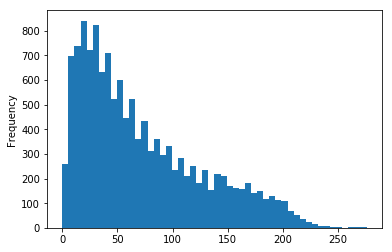

In [63]:
train.tweet.str.len().plot.hist(bins=50)

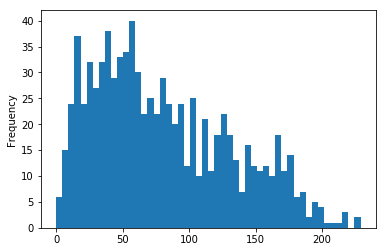

In [64]:
test.tweet.str.len().plot.hist(bins=50)

In [65]:
def get_tokens(data):
    word_dict = {}
    for ix, row in data.iterrows():
        tokens = row['tweet'].split()
        for t in tokens:
            if t in word_dict:
                word_dict[t] +=1
            else:
                word_dict[t] = 1
    return word_dict

In [66]:
train_words = get_tokens(train)
len(train_words)

17987

In [67]:
test_words = get_tokens(test)
len(test_words)

4060

In [68]:
common=set(train_words).intersection(set(test_words))
len(common)

3170

In [69]:
from keras_preprocessing.text import Tokenizer

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.tweet)
train_words = tokenizer.word_index
print(len(train_words))

17519


In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test.tweet)
test_words = tokenizer.word_index
print(len(test_words))

4024


In [72]:
common=set(train_words).intersection(set(test_words))
len(common)

3186

In [73]:
set(test_words) - common

{'04',
 '109',
 '1500',
 '28',
 '35',
 '360',
 '372m',
 '478',
 '59',
 '64',
 '7325',
 '97',
 '9794',
 'abilities',
 'abitalib',
 'aboout',
 "abortion's",
 'abstraction',
 'acca',
 'accessible',
 'actin',
 'actresses',
 'adhiyal',
 'aditi',
 'aditya',
 'administrations',
 'advisor',
 'ahmed',
 'airtight',
 'albria',
 'alexandria',
 'alfa',
 'algiers',
 'alls',
 "alzheimer's",
 'ana',
 'analyst',
 'ands',
 "angel'sheart",
 'angeles',
 'animations',
 'anniv',
 'antonia',
 'anupriya',
 'aozora',
 'aparently',
 "apple's",
 'arabian',
 'ardent',
 'argues',
 'arise',
 'arkham',
 'arti',
 'artistry',
 'asmodee',
 'assemblyman',
 'atiku',
 'atlest',
 'attracting',
 'audacity',
 'audition',
 'auditor',
 'aug',
 'austeritity',
 'avail',
 "b's",
 'bacha',
 'bafethu',
 'banana',
 'barbed',
 'barbour',
 'bargaining',
 'bbs',
 'bearer',
 'becky',
 'bedfellows',
 'beka',
 'bekah',
 'bellion',
 'bends',
 'bepannaah',
 'beyonce',
 'biggboss',
 'blacksburg',
 'blasts',
 'bletchley',
 'blindside',
 'blog

# subtask B

In [13]:
train.groupby('subtask_c').size()

subtask_c
GRP     1074
IND     2407
NULL    9364
OTH      395
dtype: int64